# Hepatitis Mortality Analysis

## Data Preprocessing 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#define names of columns
df = col_names = ["Class" , "AGE" , "SEX" , "STEROID" , "ANTIVIRALS" , "FATIGUE" ,
             "MALAISE" , "ANOREXIA" , "LIVER BIG" , "LIVER FIRM" ,  "SPLEEN PALPABLE" ,
             "SPIDERS" , "ASCITES" , "VARICES" ,  "BILIRUBIN" , "ALK PHOSPHATE" , "SGOT" ,
             "ALBUMIN" ,  "PROTIME" , "HISTOLOGY"]

df = pd.read_csv("hepatitis.data",sep = "," , names = col_names)

#Convert to lower case
df.columns = df.columns.str.lower().str.replace(' ','_')

#replace ? with  0 
df = df.replace('?',0)
df.columns[df.dtypes == 'object']

#convert
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

#convert other object items to float
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

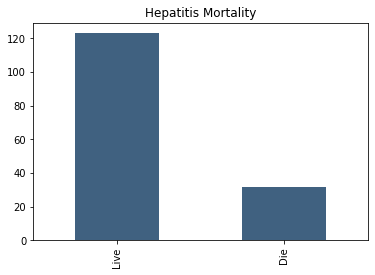

In [4]:
target_label = {"Die":1,"Live":2}
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('#F6F6F6')
ax.patch.set_alpha(1.0)
df['class'].value_counts().plot(kind='bar',color = '#406180')
plt.gca().set_xticklabels(['Live','Die'])
plt.title('Hepatitis Mortality')
plt.show()


# Oversampling 

In [5]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [6]:
xfeatures =df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [7]:
smk = SMOTETomek(random_state=42)
xfeatures_new,ylabels_new=smk.fit_sample(xfeatures,ylabels)
pd.Series(ylabels_new).value_counts()

2    116
1    116
Name: class, dtype: int64

In [8]:
xfeatures_new

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.000000,85,18,4.000000,0,1
1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.700000,96,32,4.000000,0,1
2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.700000,46,52,4.000000,80,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.000000,0,200,4.000000,0,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.900000,95,28,4.000000,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,49,1,1,2,1,1,2,1,1,1,1,1,1,2.757766,98,24,3.920823,56,2
228,41,1,2,2,1,1,1,2,1,1,1,1,1,3.777793,53,118,3.216432,0,2
229,40,1,1,1,1,1,2,2,2,2,1,1,2,0.540331,62,70,3.638676,29,2
230,42,1,1,2,1,1,1,2,2,1,1,1,2,2.819377,0,112,2.369856,0,2


In [9]:
df_new = xfeatures_new.join(ylabels_new)
df_new

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.000000,85,18,4.000000,0,1,2
1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.700000,96,32,4.000000,0,1,2
2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.700000,46,52,4.000000,80,1,2
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.000000,0,200,4.000000,0,1,2
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.900000,95,28,4.000000,75,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,49,1,1,2,1,1,2,1,1,1,1,1,1,2.757766,98,24,3.920823,56,2,1
228,41,1,2,2,1,1,1,2,1,1,1,1,1,3.777793,53,118,3.216432,0,2,1
229,40,1,1,1,1,1,2,2,2,2,1,1,2,0.540331,62,70,3.638676,29,2,1
230,42,1,1,2,1,1,1,2,2,1,1,1,2,2.819377,0,112,2.369856,0,2,1


In [10]:
for col in df_new.columns: 
    print(col)

age
sex
steroid
antivirals
fatigue
malaise
anorexia
liver_big
liver_firm
spleen_palpable
spiders
ascites
varices
bilirubin
alk_phosphate
sgot
albumin
protime
histology
class


## Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
skb = SelectKBest(score_func=chi2,k=12)
best_feature_fit = skb.fit(xfeatures_new,ylabels_new)

In [13]:
print("scores",best_feature_fit.scores_) 

scores [8.00837675e+01 1.03225806e+00 4.34603175e+00 5.88235294e-02
 8.11267606e+00 1.30804954e+01 1.46192893e+00 1.78835979e+00
 4.29153605e+00 6.79347826e+00 1.74148607e+01 1.02234043e+01
 6.47668394e+00 4.59731820e+01 4.00398673e+01 3.50856198e+01
 1.91411925e+01 4.69830697e+02 4.30878187e+00]


In [14]:
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores']) 
feature_column_names = pd.DataFrame(xfeatures_new.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,469.830697,protime
0,80.083768,age
13,45.973182,bilirubin
14,40.039867,alk_phosphate
15,35.085620,sgot
16,19.141192,albumin
10,17.414861,spiders
5,13.080495,malaise
11,10.223404,ascites
4,8.112676,fatigue


In [15]:
df_b=df_new[['class','protime','age','bilirubin','alk_phosphate','sgot','albumin','spiders','malaise','ascites','fatigue','spleen_palpable','varices']]
df_b

,class,protime,age,bilirubin,alk_phosphate,sgot,albumin,spiders,malaise,ascites,fatigue,spleen_palpable,varices
0,2,0,30,1.000000,85,18,4.000000,2,2,2,2,2,2
1,2,0,78,0.700000,96,32,4.000000,2,2,2,1,2,2
2,2,80,31,0.700000,46,52,4.000000,2,2,2,2,2,2
3,2,0,34,1.000000,0,200,4.000000,2,2,2,2,2,2
4,2,75,34,0.900000,95,28,4.000000,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,56,49,2.757766,98,24,3.920823,1,1,1,1,1,1
228,1,0,41,3.777793,53,118,3.216432,1,1,1,1,1,1
229,1,29,40,0.540331,62,70,3.638676,1,1,1,1,2,2
230,1,0,42,2.819377,0,112,2.369856,1,1,1,1,1,2


In [16]:
xfeatures_b = df_b[['class','protime','age','bilirubin','alk_phosphate','sgot','albumin','spiders','malaise','ascites','fatigue','spleen_palpable','varices']]
ylabels_b = df_b[['class']]

In [17]:
xfeatures_b

,class,protime,age,bilirubin,alk_phosphate,sgot,albumin,spiders,malaise,ascites,fatigue,spleen_palpable,varices
0,2,0,30,1.000000,85,18,4.000000,2,2,2,2,2,2
1,2,0,78,0.700000,96,32,4.000000,2,2,2,1,2,2
2,2,80,31,0.700000,46,52,4.000000,2,2,2,2,2,2
3,2,0,34,1.000000,0,200,4.000000,2,2,2,2,2,2
4,2,75,34,0.900000,95,28,4.000000,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,56,49,2.757766,98,24,3.920823,1,1,1,1,1,1
228,1,0,41,3.777793,53,118,3.216432,1,1,1,1,1,1
229,1,29,40,0.540331,62,70,3.638676,1,1,1,1,2,2
230,1,0,42,2.819377,0,112,2.369856,1,1,1,1,1,2


# Gaussian Naive Baye

In [18]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

#gia to palio
x_train, x_test, y_train, y_test = train_test_split(xfeatures_new,ylabels_new,test_size=0.4,random_state=3)

#gia ta skbest
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_b,ylabels_b,test_size=0.4,random_state=3)

In [19]:
# gia to palio

gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [20]:
from sklearn.metrics import classification_report

y_pred= gnb.predict(x_test)
class_names = ['Die(1)','Live(2)']
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.85      1.00      0.92        47
     Live(2)       1.00      0.83      0.90        46

    accuracy                           0.91        93
   macro avg       0.93      0.91      0.91        93
weighted avg       0.93      0.91      0.91        93



In [21]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='macro')

0.9130434782608696

In [22]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,47,0
Actual Positive,8,38


## Sensitivity function

In [23]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

In [24]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: nan
Accuracy: 0.9139784946236559


In [25]:
from sklearn.model_selection import cross_val_score
scores = []
for k in range(2, 17):
    score = cross_val_score(gnb, xfeatures_new, ylabels_new, cv=k, scoring='accuracy').mean()
    scores.append(score)

In [26]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)

    #print(i,"Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

85.57971014492753
89.22294172062905
88.50840336134453
88.5185185185185
88.46618357487922
89.2857142857143
89.21568627450979
89.16666666666667
88.57142857142858
89.33566433566433
89.26767676767676
89.37062937062937
89.2857142857143
89.11111111111111
89.40972222222221
89.13398692810458
89.38492063492063
89.28571428571429
its 14 for 89.40972222222221


In [27]:
def print_kfold_fig(scores):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot()
    ax.plot(range(2, 20), scores, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='#95B5D3', markersize=10)
    ax.set_title('Mean Accuracy for k Folds')
    ax.set_xlabel('K fold Value')
    ax.set_ylabel('Mean Accuracy')
    plt.xticks(np.arange(2, 20+1, 1.0))
#a = round(scores[9],2)*100

([<matplotlib.axis.XTick at 0x275bd43ad48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

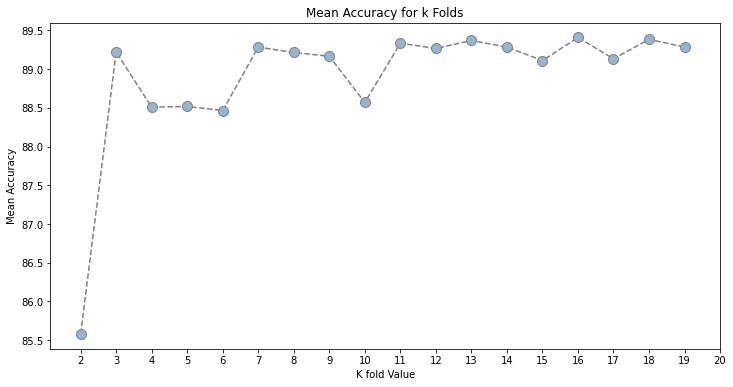

In [28]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(range(2, 20), score_acc, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='#95B5D3', markersize=10)
ax.set_title('Mean Accuracy for k Folds')
ax.set_xlabel('K fold Value')
ax.set_ylabel('Mean Accuracy')
plt.xticks(np.arange(2, 20+1, 1.0))
#a = round(scores[9],2)*100
#a=str(a)+'%'
#ax.annotate(a, xy=(11, scores[9]), xytext=(11, 0.88), fontsize=12)

In [30]:
accuracy = cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv = 16)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 89.40972222222221


In [33]:
gnb.fit(x_train_b,y_train_b)
y_pred_b= gnb.predict(x_test_b)
class_names = ['Die(1)','Live(2)']
print(classification_report(y_test_b,y_pred_b,target_names=class_names))
recall_score(y_test_b, y_pred_b, average='macro')

              precision    recall  f1-score   support

      Die(1)       1.00      1.00      1.00        47
     Live(2)       1.00      1.00      1.00        46

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



1.0

In [34]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(gnb, x_train_b, y_train_b, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)

b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

97.13250517598344
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
its 3 for 100.0


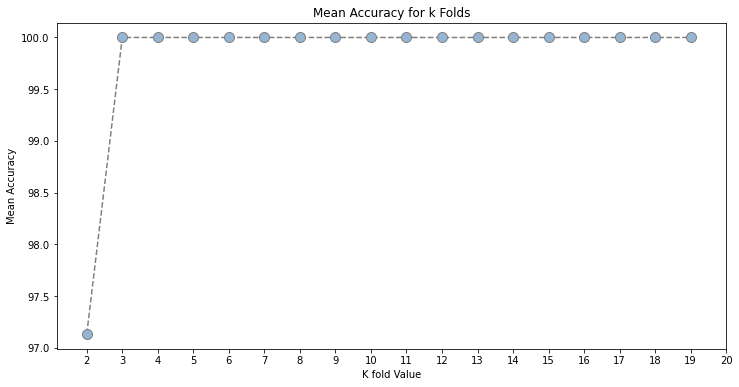

In [35]:
print_kfold_fig(score_acc)

## Support Vector Machines

In [36]:
from sklearn import svm
from sklearn.svm import SVC

In [37]:
### without features
svc=SVC(kernel="rbf",gamma="auto", C=1) 
svc.fit(x_train, y_train)
SVMprediction = svc.predict(x_test)
class_names = ['Die(1)','Live(2)']
print(classification_report(y_test,SVMprediction,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       1.00      0.45      0.62        47
     Live(2)       0.64      1.00      0.78        46

    accuracy                           0.72        93
   macro avg       0.82      0.72      0.70        93
weighted avg       0.82      0.72      0.70        93



In [38]:

recall_score(y_test, SVMprediction, average='macro')

0.7234042553191489

In [39]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(svc, x_train, y_train, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

63.2919254658385
62.611779216774586
64.74789915966386
64.76190476190476
64.76449275362319
64.77443609022558
64.86928104575163
66.89814814814814
67.03296703296702
66.78321678321679
66.79292929292929
66.85314685314687
67.77777777777779
67.7037037037037
67.53472222222221
67.56535947712418
66.86507936507937
66.9172932330827
its 14 for 67.77777777777779


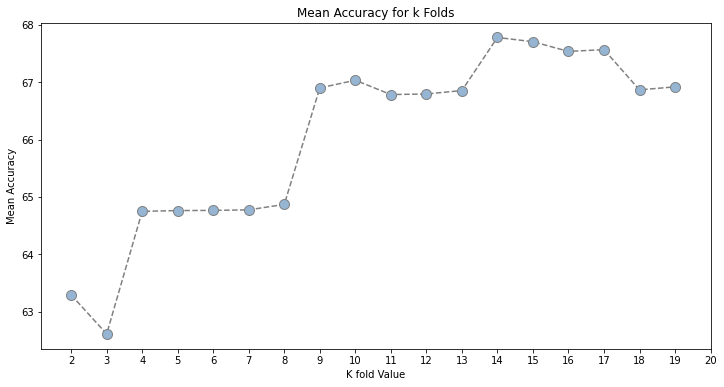

In [40]:
print_kfold_fig(score_acc)

Text(10, 0.7499, '75.0%')

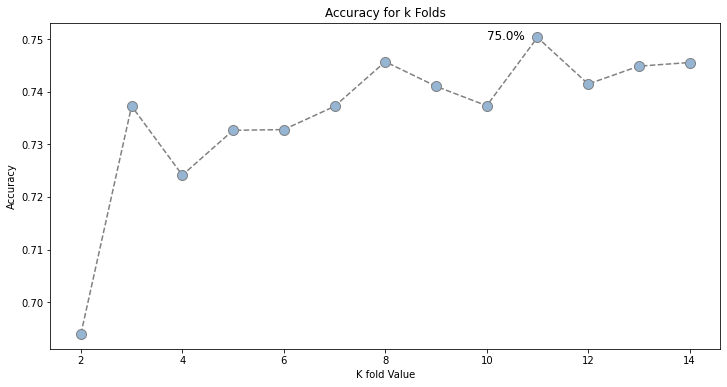

In [41]:
scores = []
for k in range(2, 15):
    score = cross_val_score(svc, xfeatures_new, ylabels_new, cv=k, scoring='accuracy').mean()
    scores.append(score)
scores
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(range(2, 15), scores, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='#95B5D3', markersize=10)
ax.set_title('Accuracy for k Folds')
ax.set_xlabel('K fold Value')
ax.set_ylabel('Accuracy')
a = float("{:.2f}".format(scores[6]))*100
a=str(a)+'%'
ax.annotate(a, xy=(10, scores[6]), xytext=(10, 0.7499), fontsize=12)

In [42]:
accuracy = cross_val_score(svc, x_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.71428571 0.71428571 0.57142857 0.57142857 0.85714286 0.71428571
 0.57142857 0.64285714 0.5        0.84615385]
Accuracy of Model with Cross Validation is: 67.03296703296702


In [43]:
for i in range(2,20):
    accuracy = cross_val_score(svc, x_train, y_train, scoring='accuracy', cv = i)
    #print(accuracy)
    #get the mean of each fold 
    print(i,"Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

2 Accuracy of Model with Cross Validation is: 63.2919254658385
3 Accuracy of Model with Cross Validation is: 62.611779216774586
4 Accuracy of Model with Cross Validation is: 64.74789915966386
5 Accuracy of Model with Cross Validation is: 64.76190476190476
6 Accuracy of Model with Cross Validation is: 64.76449275362319
7 Accuracy of Model with Cross Validation is: 64.77443609022558
8 Accuracy of Model with Cross Validation is: 64.86928104575163
9 Accuracy of Model with Cross Validation is: 66.89814814814814
10 Accuracy of Model with Cross Validation is: 67.03296703296702
11 Accuracy of Model with Cross Validation is: 66.78321678321679
12 Accuracy of Model with Cross Validation is: 66.79292929292929
13 Accuracy of Model with Cross Validation is: 66.85314685314687
14 Accuracy of Model with Cross Validation is: 67.77777777777779
15 Accuracy of Model with Cross Validation is: 67.7037037037037
16 Accuracy of Model with Cross Validation is: 67.53472222222221
17 Accuracy of Model with Cross Va

In [44]:
#with skbest
svc.fit(x_train_b, y_train_b)
SVMprediction = svc.predict(x_test_b)
class_names = ['Die(1)','Live(2)']
print(classification_report(y_test_b,SVMprediction,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       1.00      0.40      0.58        47
     Live(2)       0.62      1.00      0.77        46

    accuracy                           0.70        93
   macro avg       0.81      0.70      0.67        93
weighted avg       0.81      0.70      0.67        93



In [45]:
recall_score(y_test_b, SVMprediction, average='macro')

0.7021276595744681

In [49]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(svc, x_train_b, y_train_b, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

54.72049689440994
61.16250385445575
64.0126050420168
63.33333333333333
63.31521739130434
64.06015037593986
63.39869281045751
65.41666666666667
65.60439560439559
65.32634032634031
65.34090909090908
66.0839160839161
64.92063492063492
64.74074074074073
64.67013888888889
64.62418300653594
65.37698412698414
65.41353383458647
its 13 for 66.0839160839161


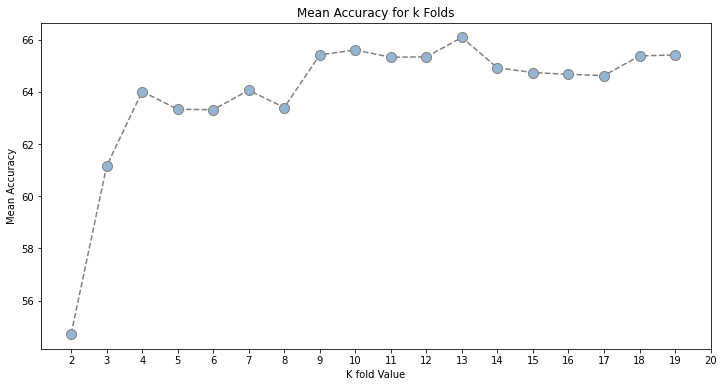

In [50]:
print_kfold_fig(score_acc)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logpred = logreg.predict(x_test)
print(classification_report(y_test,logpred,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.89      0.89      0.89        47
     Live(2)       0.89      0.89      0.89        46

    accuracy                           0.89        93
   macro avg       0.89      0.89      0.89        93
weighted avg       0.89      0.89      0.89        93



In [53]:
recall_score(y_test, logpred, average='macro')

0.8924606845513413

In [54]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(logreg, x_train, y_train, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

87.03933747412009
86.29355534998457
87.0798319327731
87.83068783068784
87.77173913043477
86.39097744360903
84.06862745098039
86.29629629629629
85.71428571428574
85.66433566433567
87.12121212121211
85.87412587412587
84.28571428571429
84.96296296296298
86.71875
87.09150326797386
86.60714285714286
86.27819548872179
its 5 for 87.83068783068784


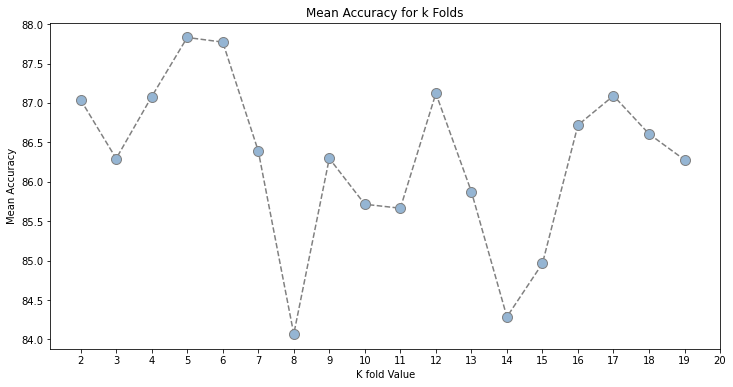

In [55]:
print_kfold_fig(score_acc)

In [58]:
logreg.fit(x_train_b, y_train_b)
logprediction = logreg.predict(x_test_b)
class_names = ['Die(1)','Live(2)']
print(classification_report(y_test_b,logprediction,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.98      0.98      0.98        47
     Live(2)       0.98      0.98      0.98        46

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [59]:
recall_score(y_test_b, logprediction, average='macro')

0.9784921369102683

In [60]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(logreg, x_train_b, y_train_b, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

93.48861283643892
96.3922294172063
96.40756302521008
97.14285714285715
96.40700483091787
98.57142857142858
97.83496732026144
96.3425925925926
97.85714285714286
95.68764568764568
95.58080808080808
97.83216783216784
97.14285714285715
97.85185185185186
96.44097222222221
95.66993464052288
98.51190476190477
97.08646616541354
its 7 for 98.57142857142858


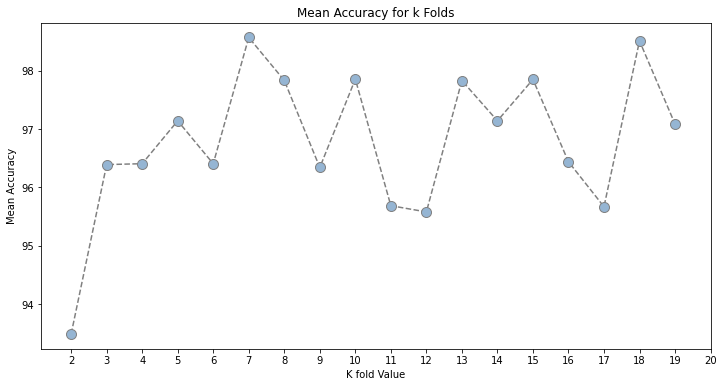

In [61]:
print_kfold_fig(score_acc)

## Decission trees

[Text(635.7980769230769, 815.4, 'X[16] <= 3.865\ngini = 0.5\nsamples = 139\nvalue = [69, 70]'),
 Text(434.5961538461538, 706.6800000000001, 'X[10] <= 1.5\ngini = 0.34\nsamples = 83\nvalue = [65, 18]'),
 Text(311.1923076923077, 597.96, 'X[14] <= 172.5\ngini = 0.208\nsamples = 68\nvalue = [60, 8]'),
 Text(193.15384615384613, 489.24, 'X[13] <= 0.688\ngini = 0.144\nsamples = 64\nvalue = [59, 5]'),
 Text(85.84615384615384, 380.52, 'X[0] <= 50.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(42.92307692307692, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(128.76923076923077, 271.79999999999995, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(300.46153846153845, 380.52, 'X[17] <= 53.5\ngini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(214.61538461538458, 271.79999999999995, 'X[16] <= 3.484\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(171.69230769230768, 163.08000000000004, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(257.53846153846155, 163.080

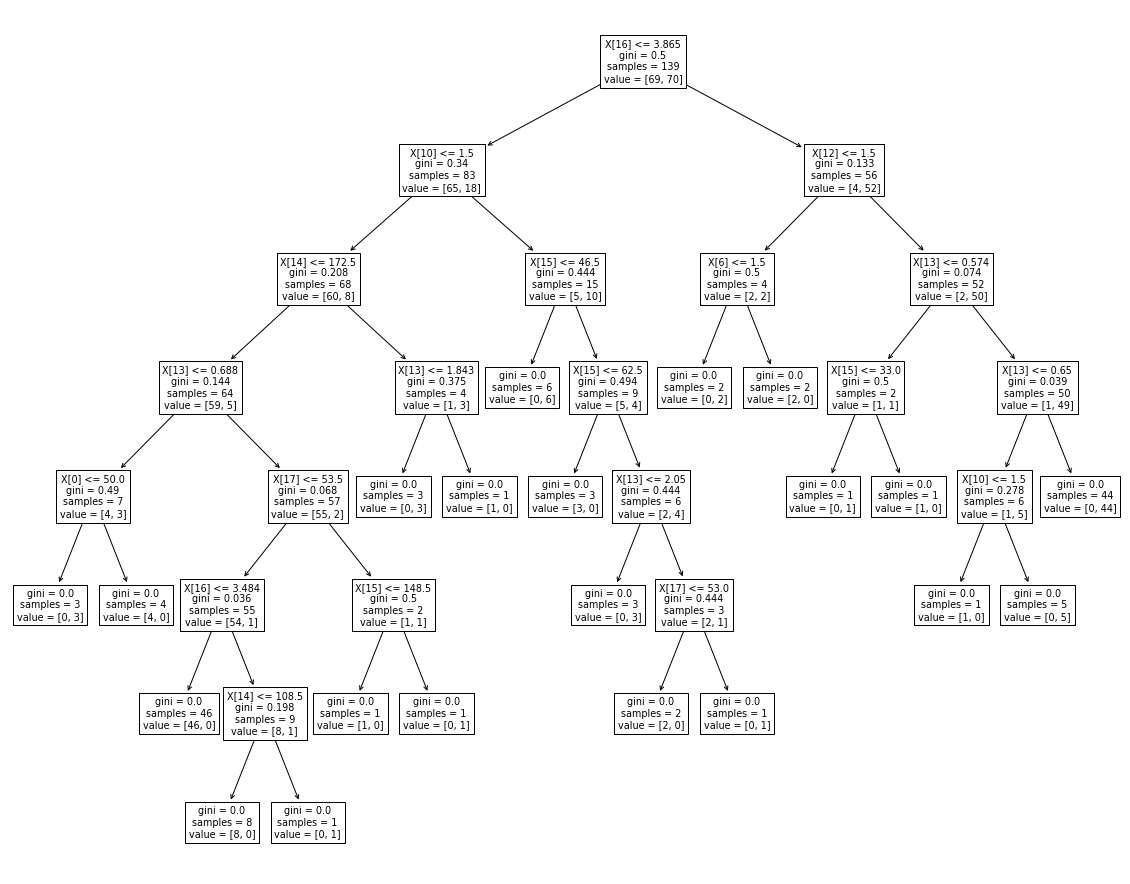

In [62]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

plt.figure(figsize=(20,16))
tree.plot_tree(clf) 


In [63]:
y_pred = clf.predict(x_test)
class_names = ['Die(1)','Live(2)']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred,target_names=class_names))

Accuracy: 0.7634408602150538
              precision    recall  f1-score   support

      Die(1)       0.77      0.77      0.77        47
     Live(2)       0.76      0.76      0.76        46

    accuracy                           0.76        93
   macro avg       0.76      0.76      0.76        93
weighted avg       0.76      0.76      0.76        93



In [64]:
recall_score(y_test, y_pred, average='macro')

0.763413506012951

In [65]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

81.99792960662526
80.58896083872958
84.18067226890756
84.2063492063492
81.94444444444446
84.88721804511277
84.92647058823529
79.12037037037038
81.37362637362638
85.66433566433567
80.61868686868686
81.95804195804196
82.77777777777779
82.59259259259261
83.50694444444444
82.51633986928105
82.14285714285715
80.5451127819549
its 11 for 85.66433566433567


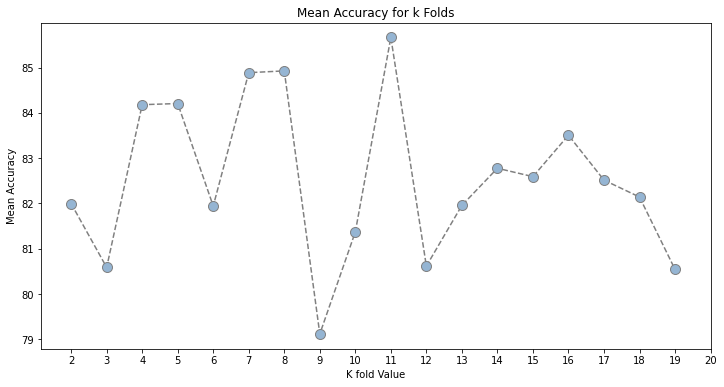

In [66]:
print_kfold_fig(score_acc)

In [67]:
scores = []
for k in range(2, 17):
    score = cross_val_score(clf, xfeatures_new, ylabels_new, cv=k, scoring='accuracy').mean()
    scores.append(score)
scores

[0.75,
 0.8018093018093019,
 0.8706896551724138,
 0.8364477335800184,
 0.8228744939271256,
 0.8581614463967406,
 0.8620689655172413,
 0.8663247863247863,
 0.8757246376811594,
 0.875245966155057,
 0.857894736842105,
 0.8612368024132729,
 0.8618697478991597,
 0.8752777777777779,
 0.8624999999999999]

[Text(558.0, 652.3199999999999, 'X[0] <= 1.5\ngini = 0.5\nsamples = 139\nvalue = [69, 70]'),
 Text(279.0, 217.44000000000005, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(837.0, 217.44000000000005, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]')]

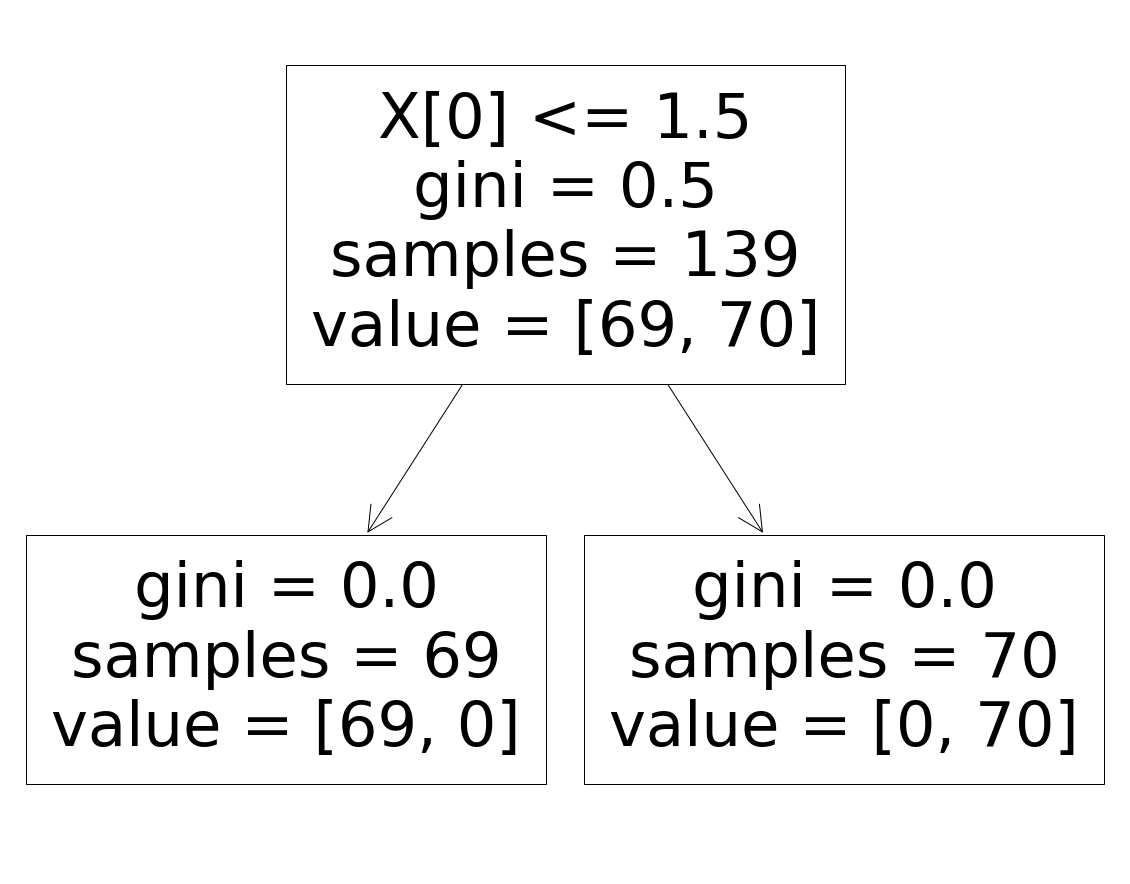

In [68]:
clf_b = tree.DecisionTreeClassifier()
clf_b = clf_b.fit(x_train_b, y_train_b)

plt.figure(figsize=(20,16))
tree.plot_tree(clf_b) 

In [69]:
y_pred = clf_b.predict(x_test_b)
class_names = ['Die(1)','Live(2)']
print("Accuracy:",metrics.accuracy_score(y_test_b, y_pred))

print(classification_report(y_test_b,y_pred,target_names=class_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      Die(1)       1.00      1.00      1.00        47
     Live(2)       1.00      1.00      1.00        46

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [70]:
recall_score(y_test, y_pred, average='macro')

1.0

In [71]:
score_acc=[]
for i in range(2,20):
    accuracy = cross_val_score(clf_b, x_train_b, y_train_b, scoring='accuracy', cv = i)
    print(accuracy.mean()*100)
    #get the mean of each fold 
    a = accuracy.mean() * 100
    score_acc.append(a)
b = max(score_acc)
o = score_acc.index(b)
print('its',o+2,'for',b)

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
its 2 for 100.0


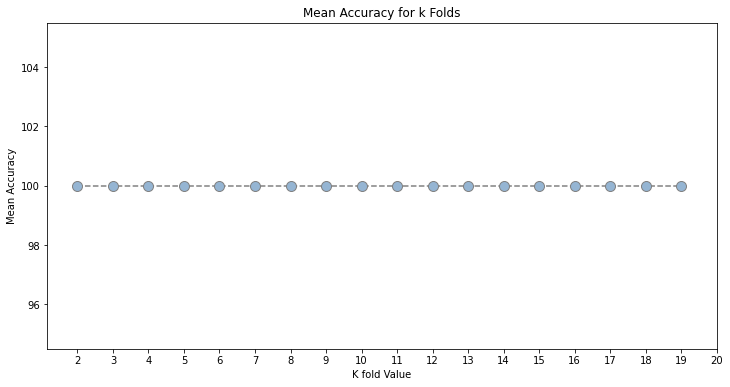

In [72]:
print_kfold_fig(score_acc)